**project description**

strees detection from text
this data is taken from tweeter

Author: Nadeen Farid
Nouran Hady
Sama Ahmed

# Importing Libraries

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import STOPWORDS
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from textblob import TextBlob
import nltk
import re
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Read the Dataset 

In [112]:
train = pd.read_csv("/kaggle/input/stress-analysis-in-social-media/dreaddit-train.csv")
test = pd.read_csv("/kaggle/input/stress-analysis-in-social-media/dreaddit-test.csv")

In [113]:
train.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [114]:
train.shape
#test.shape

(2838, 116)

In [115]:
test.shape

(715, 116)

In [116]:
full = train.append(test)
full.shape

(3553, 116)

In [117]:
full = full.drop("sentiment", axis='columns')

In [118]:
full.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_max_imagery,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1.521614e+09,5,1.806818,...,3.0,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1.527010e+09,4,9.429737,...,3.0,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1.535936e+09,2,7.769821,...,3.0,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1.516430e+09,0,2.667798,...,3.0,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1.539809e+09,24,7.554238,...,3.0,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952


# Let's Explore what we have !

In [119]:
print("Rows :", full.shape[0])
print("Columns :", full.shape[1])
print()
print("Categorical columns :")
print(full.select_dtypes(include=['object']).apply(pd.Series.nunique, axis=0))
print()
print("Description :")
print(full.info())
print()
print("Nulls:")
print(full.isnull().sum())

Rows : 3553
Columns : 115

Categorical columns :
subreddit           10
post_id           2929
sentence_range     194
text              3532
dtype: int64

Description :
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3553 entries, 0 to 714
Columns: 115 entries, subreddit to syntax_fk_grade
dtypes: float64(106), int64(5), object(4)
memory usage: 3.1+ MB
None

Nulls:
subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_imagery         0
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
Length: 115, dtype: int64


=> no nulls
=> 4 categorical columns

In [120]:
full.sample()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_max_imagery,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade
1079,survivorsofabuse,9xnknx,"[10, 15]","But those are your most valuable skills, they ...",1109,0,0.8,1.542385e+09,54,6.881667,...,2.4,1.125,1.0,1.0,1.67071,1.31429,1.93066,0.93,9,4.964444


### Determining Sentiment Polarity from Words

In [121]:
#Sentiment Detection
def mood(txt):
    return TextBlob(txt).sentiment.polarity

In [122]:
#Get text
posts = full[["text"]]
posts

,text
0,"He said he had not felt that way before, sugge..."
1,"Hey there r/assistance, Not sure if this is th..."
2,My mom then hit me with the newspaper and it s...
3,"until i met my new boyfriend, he is amazing, h..."
4,October is Domestic Violence Awareness Month a...
...,...
710,i have horrible vivid nightmares every night. ...
711,Also I can't think about both of them without ...
712,"Furthermore, I told him before we got really s..."
713,Here's the link to my amazon wish list where t...


In [123]:
#Adding Mood Detection as column
posts["sentiment"] = posts["text"].apply(mood)
posts.head()

,text,sentiment
0,"He said he had not felt that way before, sugge...",-0.002742
1,"Hey there r/assistance, Not sure if this is th...",0.292857
2,My mom then hit me with the newspaper and it s...,0.011894
3,"until i met my new boyfriend, he is amazing, h...",0.141671
4,October is Domestic Violence Awareness Month a...,-0.204167


In [124]:
print("Value Exploration :")
print("Minimum Sentiment :", posts["sentiment"].min())
print("Maximum Sentiment :", posts["sentiment"].max())
print()
print("Counts :")
print(posts.sentiment.value_counts())

Value Exploration :
Minimum Sentiment : -1.0
Maximum Sentiment : 1.0

Counts :
 0.000000    84
 0.250000    24
 0.100000    23
 0.150000    17
 0.125000    16
             ..
 0.200926     1
-0.009375     1
-0.045833     1
 0.244643     1
 0.136364     1
Name: sentiment, Length: 2627, dtype: int64


Exploring Words

**Clean text**

In [125]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))
def removal(text):
    text = str(text).lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [w for w in text.split(' ') if w not in stopwords]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
posts["text"] = posts["text"].apply(removal)
posts["text"]

0      said felt way before, sugget go rest ..trigger...
1      hey r/assistance, sure right place post this.....
2      mom hit newspap shock would this, know like pl...
3      met new boyfriend, amazing, kind, sweet, good ...
4      octob domest violenc awar month domest violenc...
                             ...                        
710    horribl vivid nightmar everi night. sometim th...
711    also can't think without get angri jealous aga...
712    furthermore, told got realli serious anxieti d...
713    here link amazon wish list two item are:  link...
714    keep us protected? alreadi told unwelcom perso...
Name: text, Length: 3553, dtype: object

In [126]:
def wc(data,bgcolor):
    plt.figure(figsize=(20,20))
    #mask=np.array(Image.open('/kaggle/input/stressanalysisinsocialmedia/stress-954814_960_720.png'))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis("off")

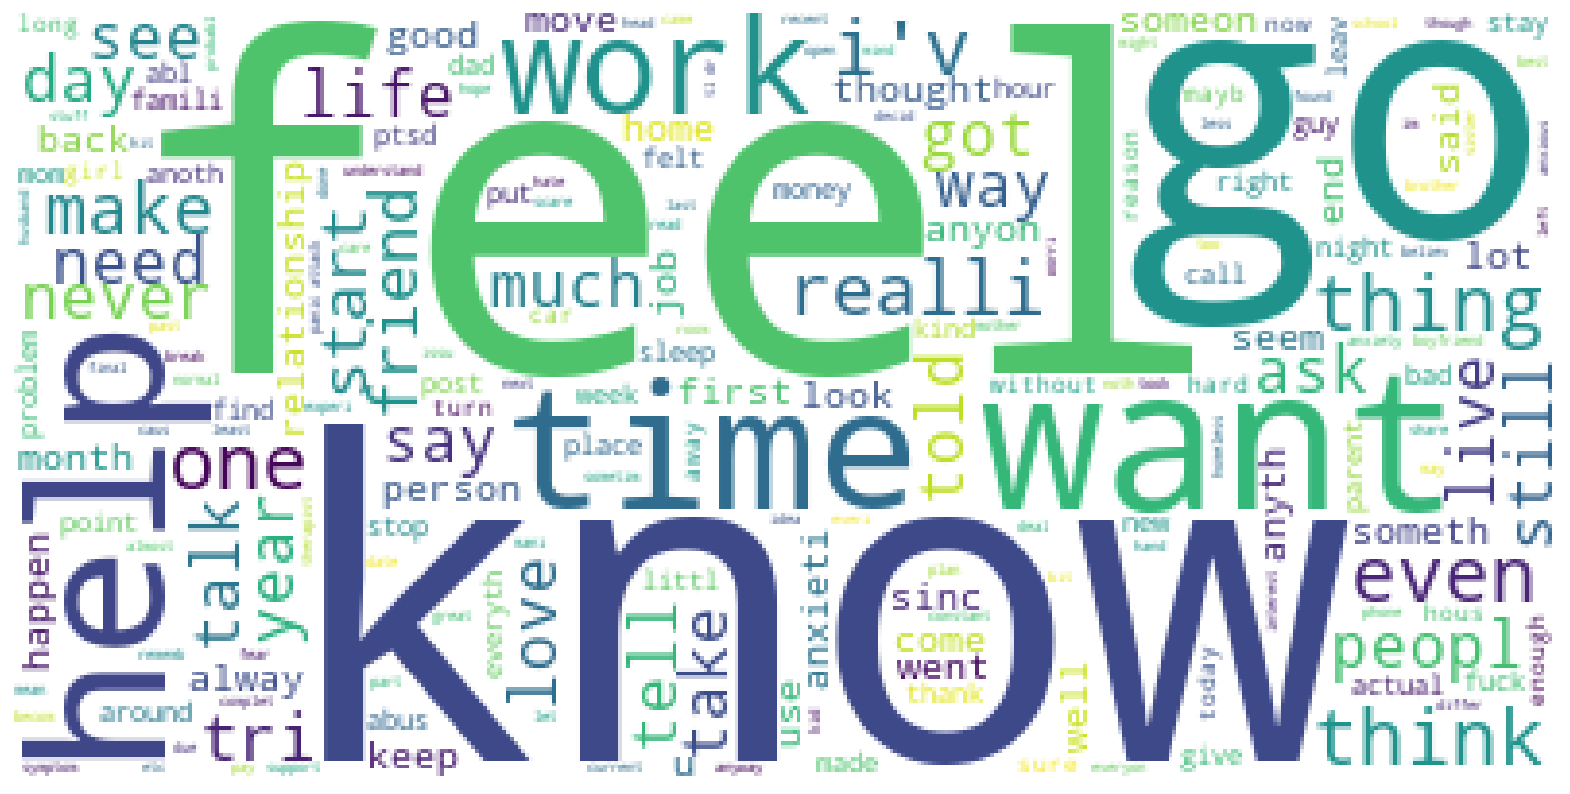

In [127]:
wc(posts.text,'white')

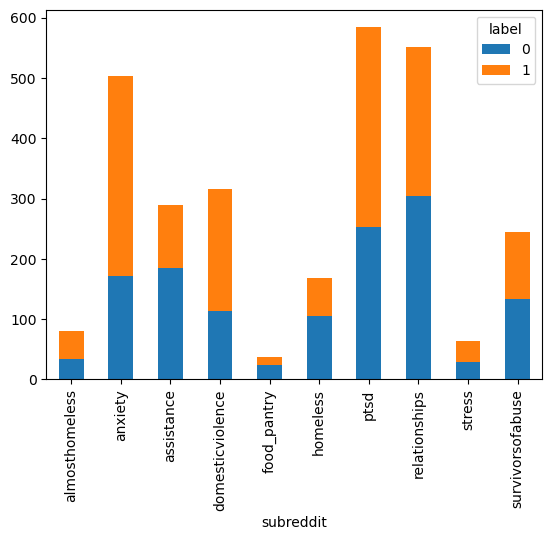

In [128]:
pd.crosstab(train.subreddit, train.label).plot(kind ='bar',stacked=True,);

In [129]:
full["label"].head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [130]:
#Adding meaning to text from og dataset
posts["meaning"] = full["label"].map({0:"Unstressed", 1:"Stressed"})
#posts = posts[["text", "meaning"]]
posts.head()

,text,sentiment,meaning
0,"said felt way before, sugget go rest ..trigger...",-0.002742,Stressed
1,"hey r/assistance, sure right place post this.....",0.292857,Unstressed
2,"mom hit newspap shock would this, know like pl...",0.011894,Stressed
3,"met new boyfriend, amazing, kind, sweet, good ...",0.141671,Stressed
4,octob domest violenc awar month domest violenc...,-0.204167,Stressed


In [131]:
#Applying sentiment
posts["sentiment"] = posts["text"].apply(mood)
posts.head()

,text,sentiment,meaning
0,"said felt way before, sugget go rest ..trigger...",0.027273,Stressed
1,"hey r/assistance, sure right place post this.....",0.360714,Unstressed
2,"mom hit newspap shock would this, know like pl...",0.199273,Stressed
3,"met new boyfriend, amazing, kind, sweet, good ...",0.190156,Stressed
4,octob domest violenc awar month domest violenc...,-0.085714,Stressed


We can infer from this, that adding meaning to our texts, enhances its sentiment polarity, thus better enabling detection of stress !

<Axes: xlabel='meaning', ylabel='count'>

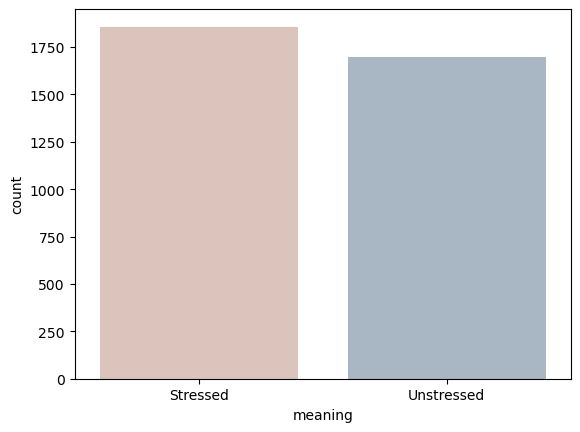

In [132]:
sns.countplot(x='meaning',data = posts, palette= ["#e1c0b6", "#a3b8c8"])

# Let's begin Modelling !

In [133]:
#Assign variables; x = features & y = target
x = posts.text
y = posts.meaning

In [134]:
print(x)

0      said felt way before, sugget go rest ..trigger...
1      hey r/assistance, sure right place post this.....
2      mom hit newspap shock would this, know like pl...
3      met new boyfriend, amazing, kind, sweet, good ...
4      octob domest violenc awar month domest violenc...
                             ...                        
710    horribl vivid nightmar everi night. sometim th...
711    also can't think without get angri jealous aga...
712    furthermore, told got realli serious anxieti d...
713    here link amazon wish list two item are:  link...
714    keep us protected? alreadi told unwelcom perso...
Name: text, Length: 3553, dtype: object


In [135]:
vect=CountVectorizer(stop_words="english")
x=vect.fit_transform(x)

In [136]:
print(x)

  (0, 7985)	1
  (0, 3472)	1
  (0, 10185)	1
  (0, 9020)	1
  (0, 7768)	1
  (0, 9587)	1
  (0, 241)	1
  (0, 10477)	1
  (0, 4574)	1
  (0, 5393)	1
  (0, 2282)	1
  (0, 5481)	1
  (0, 3457)	1
  (0, 2735)	3
  (0, 4453)	1
  (0, 5689)	1
  (0, 8999)	1
  (0, 7372)	1
  (0, 4409)	1
  (0, 5541)	1
  (0, 1893)	1
  (0, 8957)	1
  (0, 7253)	1
  (0, 9295)	1
  (0, 6163)	1
  :	:
  (3551, 9057)	1
  (3551, 8569)	1
  (3551, 2511)	1
  (3551, 10331)	1
  (3551, 4517)	1
  (3551, 5345)	1
  (3551, 5003)	1
  (3551, 3334)	1
  (3552, 6763)	1
  (3552, 9458)	1
  (3552, 9576)	1
  (3552, 1481)	1
  (3552, 4417)	1
  (3552, 5934)	1
  (3552, 5926)	1
  (3552, 6115)	1
  (3552, 5437)	1
  (3552, 300)	1
  (3552, 6406)	1
  (3552, 419)	1
  (3552, 5310)	1
  (3552, 7222)	2
  (3552, 8523)	1
  (3552, 8461)	1
  (3552, 9873)	1


#### Splitting the dataset

In [137]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=43)

> naive bayes

In [138]:
from sklearn.naive_bayes import MultinomialNB
mb=MultinomialNB()
m1=mb.fit(x_train,y_train).predict(x_test)

print("Model Accuracy is {p}%".format(p =round (accuracy_score(m1,y_test)*100, 2)))

Model Accuracy is 73.79%


              precision    recall  f1-score   support

    Stressed       0.70      0.87      0.77       463
  Unstressed       0.80      0.60      0.69       426

    accuracy                           0.74       889
   macro avg       0.75      0.73      0.73       889
weighted avg       0.75      0.74      0.73       889



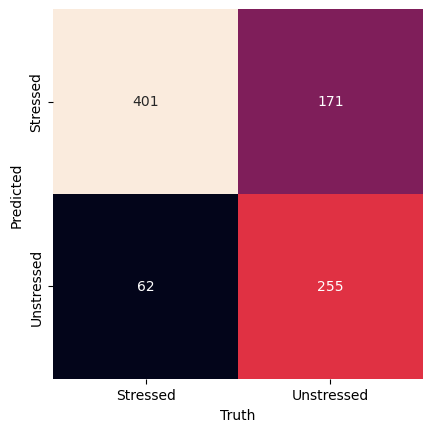

In [139]:
# from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(m1, y_test)
pred = np.unique(m1)
sns.heatmap(matrix, square = True, annot = True, fmt = 'd', cbar = False,
            xticklabels = pred, yticklabels = pred)
plt.xlabel('Truth')
plt.ylabel('Predicted')
print(classification_report(y_test, m1))

> Logistic Regression

In [140]:
from sklearn.linear_model import LogisticRegression
m2=LogisticRegression().fit(x_train, y_train)
score = m2.score(x_test,y_test)
#accuracy_score(m2,y_test)
print("Model Accuracy is {p}%".format(p =round (score*100, 2)))

Model Accuracy is 72.44%


In [141]:
 predictions = m2.predict(x_test)

              precision    recall  f1-score   support

    Stressed       0.73      0.76      0.74       463
  Unstressed       0.72      0.69      0.71       426

    accuracy                           0.72       889
   macro avg       0.72      0.72      0.72       889
weighted avg       0.72      0.72      0.72       889



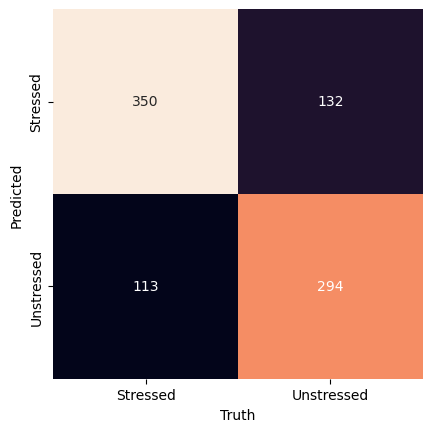

In [142]:
# from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(predictions, y_test)
pred = np.unique(predictions)
sns.heatmap(matrix, square = True, annot = True, fmt = 'd', cbar = False,
            xticklabels = pred, yticklabels = pred)
plt.xlabel('Truth')
plt.ylabel('Predicted')
print(classification_report(y_test, predictions))

> Decision Tree

In [143]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()
d.fit(x_train,y_train)
m3=d.predict(x_test)
print("Model Accuracy is {p}%".format(p =round (accuracy_score(y_test,m3)*100, 2)))

Model Accuracy is 62.09%


              precision    recall  f1-score   support

    Stressed       0.64      0.63      0.63       463
  Unstressed       0.60      0.61      0.61       426

    accuracy                           0.62       889
   macro avg       0.62      0.62      0.62       889
weighted avg       0.62      0.62      0.62       889



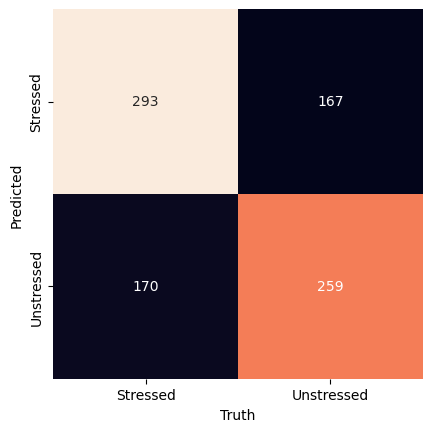

In [144]:
# from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(m3, y_test)
pred = np.unique(m3)
sns.heatmap(matrix, square = True, annot = True, fmt = 'd', cbar = False,
            xticklabels = pred, yticklabels = pred)
plt.xlabel('Truth')
plt.ylabel('Predicted')
print(classification_report(y_test, m3))

> let us try

In [145]:
#Using Naive Bayes
prompt = "Its a beautiful day & i can't stop myself from smiling"
p = vect.transform([prompt]).toarray()
op = mb.predict(p)
print(op)

['Unstressed']


In [146]:
#Using Logistic Regression
prompt = "The weather is pleasant"
p = vect.transform([prompt]).toarray()
op = m2.predict(p)
print(op)

['Unstressed']


In [147]:
#Using Decision Trees
prompt = "Sometime I feel like I need some time"
p = vect.transform([prompt]).toarray()
op = d.predict(p)
print(op)

['Stressed']


In [148]:
#Using Naive Bayes
prompt = "He felt underappreciated and resented his job"
p = vect.transform([prompt]).toarray()
op = mb.predict(p)
print(op)

['Stressed']


In [149]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.9/19.9 MB 37.6 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.1/288.1 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.5 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4712 sha256=73115122e95ec8d969ae247ffaa48df79e8d5b58adbf4d5c86edd230d36fedd7
  Stored in directory: /root/.cache/pip/wheels/0c/c2/0e/3b9c6845c6a4e35beb90910cc70d9ac9ab5d47402bd62af0df
Successfully built ffmpy
  Attempting uninstall: mdit-py-plugins
    Found existing installation: mdit-py-plugins 0.3.5
    Uninstalling mdit-py-plugins-0.3.5:
      Successfully uninstalled mdit-py-plugins-0.3.5


In [150]:
import gradio as gr

In [151]:
def trans_predict(sentence):
  p = vect.transform([sentence]).toarray()
  op = mb.predict(p)
  return op

In [152]:
css_code='body{background-image:url("https://media.istockphoto.com/id/1256252051/vector/people-using-online-translation-app.jpg?s=612x612&w=0&k=20&c=aa6ykHXnSwqKu31fFR6r6Y1bYMS5FMAU9yHqwwylA94=");}'

demo = gr.Interface(
    fn=trans_predict, 
    inputs=gr.Textbox(label="Type a sentence in English"), 
    outputs=gr.Textbox(label="Result"), 
    title="Stress Recognition",
    description= "This is machine translation System, it takes a sentence in English as input and returns it's French translation",
    css = css_code
)

demo.launch()


Kaggle notebooks require sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://52bb317dd0b6651b48.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
